In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from urllib.request import urlretrieve
from os.path import isfile
from PIL import Image
from sklearn.decomposition import PCA

In [3]:
def download_files():
    """
    Este metodo descarga los archivos de imagenes sino existen
    """
    path_tar = os.path.join("data",'faces.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

# Train data

In [4]:
d_name = 'data/faces/rawdata'
train_ids = [1855,4729,3954,2886,3168,4943,2288,2872,5059,2618,3365,1432,5092,4140,1600,4372,3157,2085,1264,4716,3533,3701,4524,1290,2415,2627,3391,2243,4988,5066,4386,2071,2875,2049,4944,4178,3953,2881,1638,1852,3739,4381,3998,2076,3396,2244,5061,2620,1899,1297,2412,3706,4523,1263,4711,3534,1607,4375,3150,2082,3362,1435,5095,4147,4986,5068,4388,2843,3991,2629,1890,4718,1864,4972,3965,3159,2616,2424,2040,3192,4185,5057,2272,2888,3166,1631,4343,1403,4171,2286,3354,4515,3730,3502,1255,4727,1609,3962,4975,4149,3708,1863,1897,1299,2844,3996,2078,3398,4981,3505,1252,4720,4512,3737,1404,4176,2281,3353,3161,1636,4344,4182,5050,2275,2047,3195,2423,2611,3763,4546,4774,3551,2483,4310,1662,3135,3909,3307,4122,1450,1696,2013,2221,3797,2645,4780,2477,4921,3338,3936,1239,1837,4579,2448,2810,5209,4787,2470,3790,2642,2226,5003,1691,2014,2828,3300,4125,4919,1457,4317,1665,3132,4773,3556,2484,3764,4541,2817,2219,1830,2689,3569,3931,4328,4926,1468,5035,1495,2210,2022,5207,2446,3594,4583,2674,3560,4745,1237,4577,1839,2680,3752,4113,1461,3336,3104,3938,4321,1653,3799,2479,1698,2821,3907,3309,4910,4548,1806,3103,4326,1654,4114,1466,4928,3331,4570,2687,3755,3567,4742,1230,4584,2673,2441,3593,2025,2819,5200,5032,1492,2217,3558,1801,1459,4917,4319,3900,2228,2826,4789,1298,1896,3399,4980,2079,2845,3997,4148,4974,1608,3963,3709,1862,2046,3194,4183,5051,2274,2610,2422,4513,3736,3504,4721,1253,3160,4345,1637,4177,1405,2280,3352,1865,4719,3158,3964,4973,4389,2842,3990,5069,4987,2628,1891,4170,1402,2287,3355,3167,2889,4342,1630,3503,4726,1254,4514,3731,2425,2617,4184,5056,2273,2041,3193,3952,2880,1639,4179,4945,1853,3738,2048,2874,4710,1262,3535,3707,4522,3363,5094,4146,1434,4374,1606,3151,2083,3397,2245,5060,4380,2077,3999,1296,2413,2621,1898,5058,2873,2619,4728,1854,4942,2289,3169,3955,2887,2626,1291,2414,4387,2070,3390,2242,5067,4989,4373,1601,3156,2084,3364,5093,4141,1433,3700,4525,4717,1265,3532,2440,3592,4585,2672,1493,5033,2216,2818,2024,5201,1467,4929,4115,3330,3102,1655,4327,3566,1231,4743,4571,2686,3754,2827,2229,4788,1800,3559,4318,3901,1458,4916,4576,1838,2681,3753,3561,1236,4744,3939,3105,1652,4320,1460,4112,3337,2023,5206,1494,5034,2211,4582,2675,2447,3595,3308,4911,3906,4549,1807,2478,3798,1699,2820,1664,4316,3133,3301,4918,1456,4124,3765,4540,4772,3557,2485,3791,2643,4786,2471,1690,2829,2015,2227,5002,3568,1831,2688,4927,1469,3930,4329,2218,2816,2220,5005,1697,2012,4781,2476,3796,2644,4775,3550,2482,3762,1809,4547,3306,1451,4123,1663,4311,3908,3134,2449,2811,5208,3937,4920,3339,1836,4578,1238,1944,4638,3079,2997,3845,4852,2399,2963,5148,2709,3274,4051,5183,1523,4263,1711,2194,3046,4607,1375,3422,3610,4435,1381,2504,2736,2352,3280,5177,4899,4297,2160,2158,2964,4069,4855,2990,3842,1729,1943,3628,4290,2167,3889,2355,3287,5170,2731,1988,1386,2503,3617,4432,4600,1372,3425,4264,1716,2193,3041,3273,5184,1524,5179,4897,4299,3880,2952,2738,1981,4609,1975,4863,3048,3874,2707,2535,3083,2151,5146,4094,2363,3077,2999,4252,1720,4060,1512,3245,2397,4404,3621,3413,4636,1344,1718,3873,4058,4864,3619,1972,1986,1388,2169,3887,2955,3289,4890,3414,4631,1343,4403,3626,4067,1515,3242,2390,3070,4255,1727,5141,4093,2364,3084,2156,2532,2700,3672,4457,1919,1317,4665,2592,3440,1773,4201,3818,3024,3216,1541,4033,1787,2102,2330,5115,2754,3686,4691,2566,4830,3229,3827,1328,4468,1926,2559,2901,4696,2561,2753,3681,2337,5112,1780,2939,2105,3211,1546,4808,4034,1774,4206,3023,1310,4662,2595,3447,3675,4450,2906,2308,1921,2798,3478,3820,4239,1579,4837,1584,5124,2301,2133,3485,2557,4492,2765,3471,1326,4654,1928,4466,3643,2791,1570,4002,3227,3829,3015,1742,4230,3688,2568,1789,2930,3816,3218,4801,1917,4459,1319,3012,1745,4237,4839,1577,4005,3220,4461,3644,2796,3476,1321,4653,4495,2762,3482,2550,2908,2134,1583,5123,2306,3449,1910,4806,1548,4208,3811,2339,2937,4698,1389,1987,3288,4891,3886,2954,2168,4865,4059,1719,3872,3618,1973,3085,2157,5140,4092,2365,2701,2533,4402,3627,3415,1342,4630,3071,1726,4254,1514,4066,3243,2391,1974,4608,3875,3049,4862,4298,3881,2953,4896,5178,2739,1980,1513,4061,3244,2396,2998,3076,1721,4253,3412,1345,4637,4405,3620,2534,2706,5147,4095,2362,3082,2150,2991,3843,1728,4854,4068,1942,3629,2965,2159,1373,4601,3424,3616,4433,3272,1525,4057,5185,1717,4265,2192,3040,2354,3286,5171,4291,3888,2166,1387,2502,2730,1989,5149,2962,2708,4639,1945,4853,2398,2996,3844,3078,2737,1380,2505,4296,2161,2353,3281,4898,5176,1710,4262,2195,3047,3275,1522,4050,5182,3611,4434,1374,4606,3423,3483,2551,4494,2763,5122,1582,2307,2135,2909,4004,4838,1576,3221,3013,4236,1744,3477,4652,1320,4460,3645,2797,2936,2338,4699,1911,3448,4209,3810,4807,1549,1929,4467,3642,2790,3470,4655,1327,3014,3828,4231,1743,4003,1571,3226,2132,5125,1585,2300,4493,2764,3484,2556,3219,4800,3817,1318,1916,4458,2569,3689,1788,2931,4207,1775,3022,3210,4035,1547,4809,3674,4451,4663,1311,2594,3446,2752,3680,4697,2560,1781,2104,2938,2336,5113,3479,1920,2799,1578,4836,3821,4238,2309,2907,2331,5114,1786,2103,4690,2567,2755,3687,4664,1316,2593,3441,3673,4456,1918,3217,4032,1540,4200,1772,3025,3819,2558,2900,3826]
X_train = []
for img in train_ids:
    bytes_read = open(os.path.join(d_name,str(img)), "rb").read()
    img = Image.frombytes('L', (128,128), bytes_read)
    X_train.append(np.array(img).flatten())
    
X_train = np.array(X_train)

# Test data

In [5]:
d_name = 'data/faces/rawdata'
test_ids = [4831,3228,4469,1927,1329,5109,2922,2748,4679,1905,4813,3038,3804,2777,4480,3497,2545,2121,2313,5136,1596,4222,1750,3007,3235,4010,1562,3651,2783,4474,4646,1334,3463,3803,1768,4028,4814,1902,3669,2589,2119,2925,4641,1333,3464,3656,2784,4473,3232,4017,1565,4225,1757,3000,2314,5131,1591,2126,3490,2542,2770,4487,1934,4648,3009,3835,4822,2913,5138,1598,2779,3499,4021,1553,3204,3036,4213,1761,2580,3452,4677,1305,4445,3660,2574,4683,2746,3694,5107,2322,2110,1795,4489,2128,2914,4019,4825,1759,3832,3658,1933,2117,1792,5100,2325,2741,3693,2573,4684,4442,3667,2587,3455,4670,1302,3031,4214,1766,4026,1554,3203,2371,5154,4086,3091,2143,2527,2715,1356,4624,3401,3633,4416,1958,3257,2385,1500,4072,1732,4240,3859,3065,1993,2518,3892,2940,4885,3866,2188,4871,3268,4429,1967,1369,1735,4247,3062,3250,2382,1507,4849,4075,3634,4411,1351,4623,3406,2712,2520,2978,3096,2144,2376,5153,4081,3439,1960,1538,4876,5198,3861,4278,4882,2349,3895,2947,1994,1969,4427,3602,3430,1367,4615,3868,2186,3054,1703,4271,1531,4043,5191,3266,2172,4285,5165,2340,3292,2724,2516,1393,3259,4840,2985,3857,1358,1956,4418,2529,4088,2971,2511,1394,2723,5162,2347,3295,2949,2175,4282,4878,1536,4044,5196,3261,2181,3053,1704,4276,3437,1360,4612,4420,3605,2976,3098,2378,1951,3408,4249,2982,3850,4847,1509,1758,3833,4824,4018,3659,1932,4488,2915,2129,2586,3454,1303,4671,4443,3666,1555,4027,3202,3030,1767,4215,5101,2324,2116,1793,2572,4685,2740,3692,1599,5139,2912,3498,2778,4649,1935,4823,3834,3008,2747,3695,2575,4682,2111,1794,5106,2323]
X_test = []
for img in test_ids:
    bytes_read = open(os.path.join(d_name,str(img)), "rb").read()
    img = Image.frombytes('L', (128,128), bytes_read)
    X_test.append(np.array(img).flatten())
    
X_test = np.array(X_test)

# Data full

In [6]:
d_name = 'data/faces/rawdata'
data_ids = np.concatenate((train_ids,test_ids))
X_full = []
for img in data_ids:
    bytes_read = open(os.path.join(d_name,str(img)), "rb").read()
    img = Image.frombytes('L', (128,128), bytes_read)
    X_full.append(np.array(img).flatten())
    
X_full = np.array(X_full)

# Utilities

In [7]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_images(originalImage,img1comp,img3comp,img10comp,img95percent, img99percent):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,6, constrained_layout=True, figsize=(20,10))
    ax[0].imshow(fn_shape(originalImage))
    ax[0].set_title(label="Cara original")
    ax[1].imshow(fn_shape(img1comp))
    ax[1].set_title(label="MeanFace + 1 component")
    ax[2].imshow(fn_shape(img3comp))
    ax[2].set_title(label="MeanFace + 3 components")
    ax[3].imshow(fn_shape(img10comp))
    ax[3].set_title(label="MeanFace + 10 components")
    ax[4].imshow(fn_shape(img95percent))
    ax[4].set_title(label="MeanFace + 95% components")
    ax[5].imshow(fn_shape(img99percent))
    ax[5].set_title(label="MeanFace + 99% components")
    plt.show()
    

# 3

## 3.1

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Mean Image'}>)

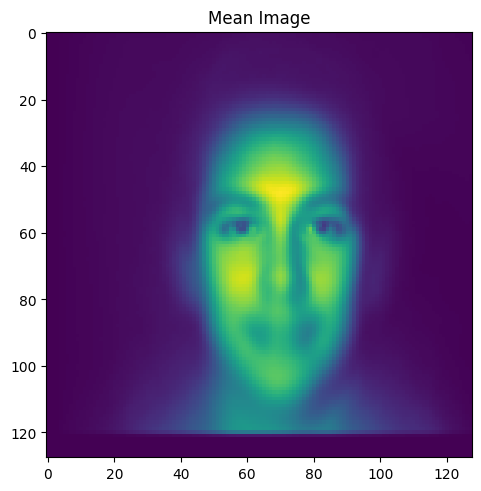

In [8]:
X_mean = X_train.mean(axis=0)
plot_1_images(X_mean, label="Mean Image")

## 3.2

In [9]:
X_center = X_train - X_mean

pca = PCA()
pca.fit(X_center)

# Varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza explicada acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Encontrar el número de componentes necesarios para el 95% de varianza
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1

# Ahora aplicamos PCA con el número óptimo de componentes
pca = PCA(n_components=n_components_99)
pca.fit(X_center)
X_reduced = pca.transform(X_center)
eigen_faces = pca.components_

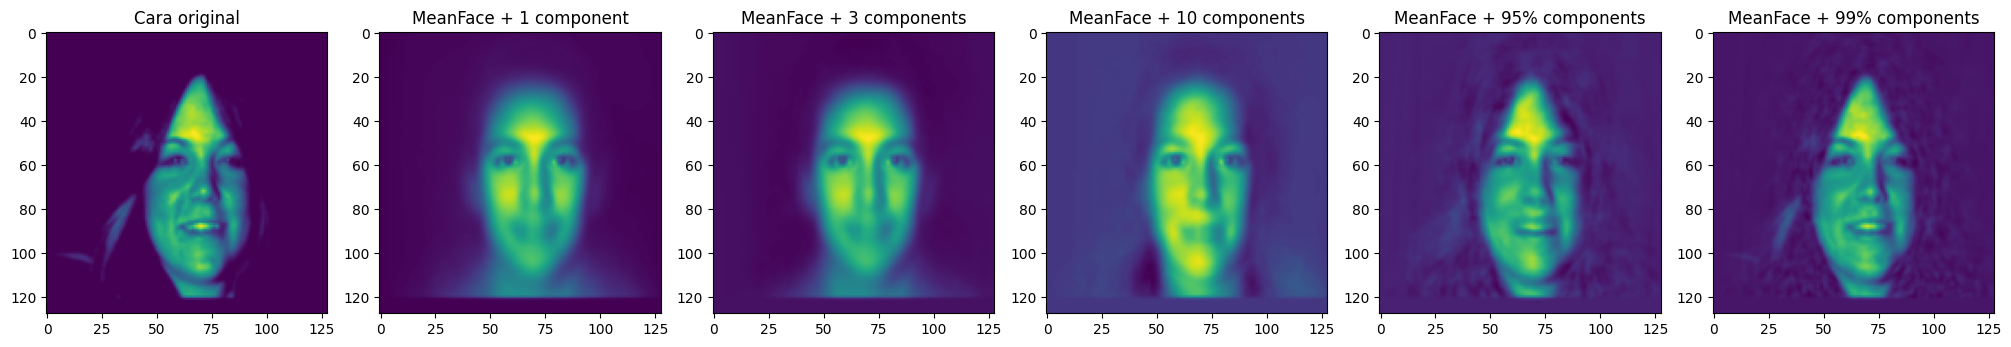

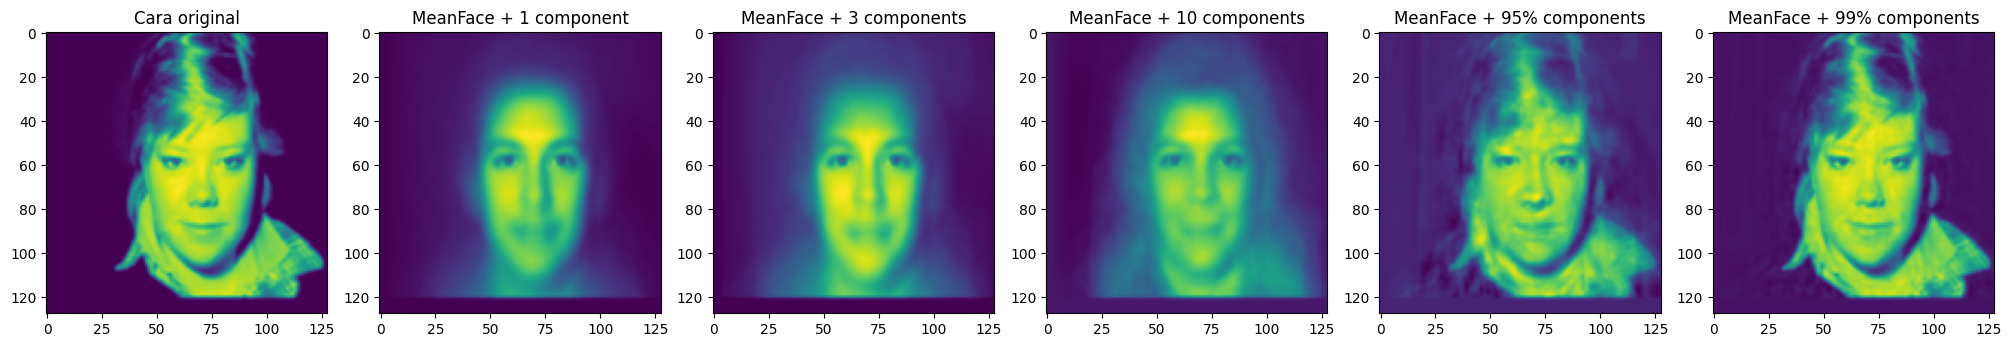

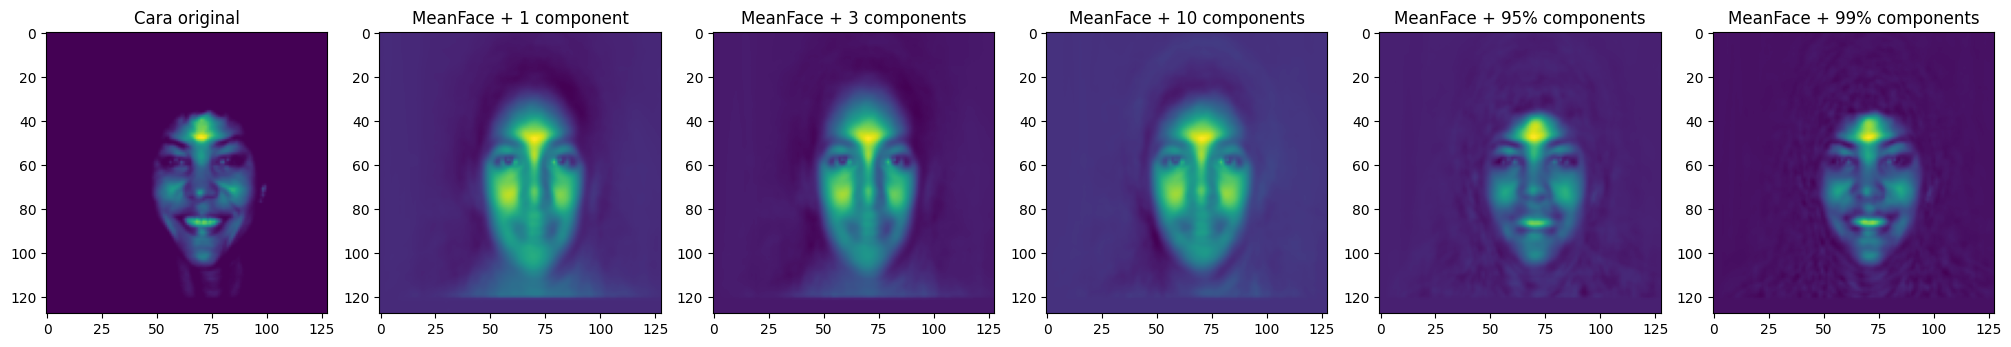

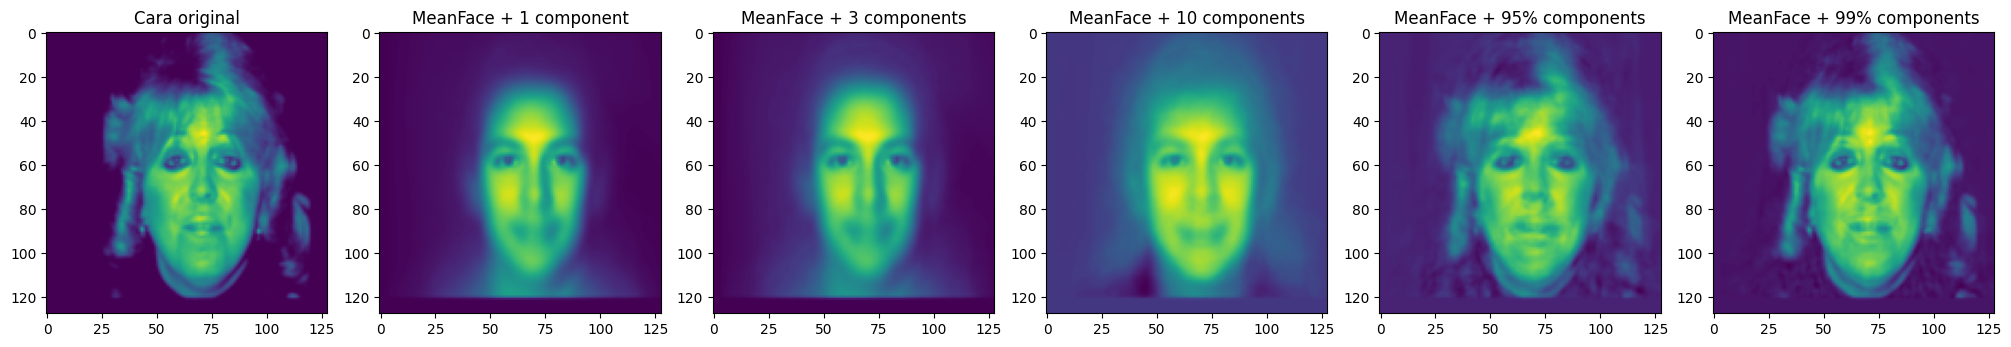

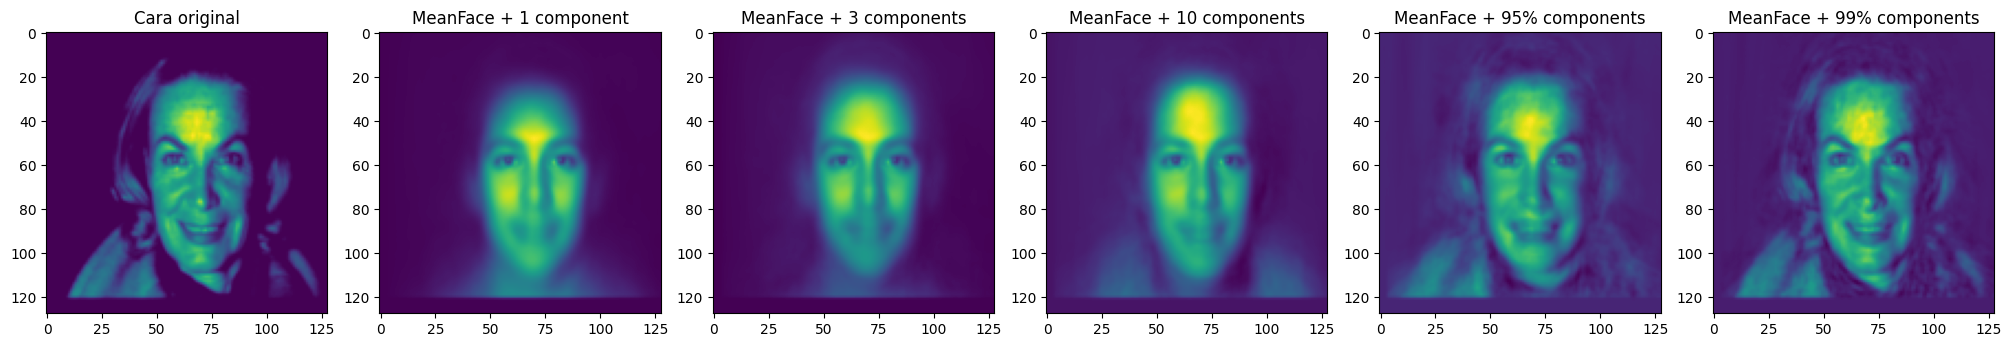

In [10]:
for i in range(5):
    face_1 = X_mean + np.sum(np.dot(X_reduced[i].reshape(1,-1)[:,:1],eigen_faces[:1,:]),axis=0)
    face_3 = X_mean + np.sum(np.dot(X_reduced[i].reshape(1,-1)[:,:3],eigen_faces[:3,:]),axis=0)
    face_10 = X_mean + np.sum(np.dot(X_reduced[i].reshape(1,-1)[:,:10],eigen_faces[:10,:]),axis=0)
    face_95_percent = X_mean + np.sum(np.dot(X_reduced[i].reshape(1,-1)[:,:n_components_95],eigen_faces[:n_components_95,:]),axis=0)
    face_99_percent = X_mean + np.sum(np.dot(X_reduced[i].reshape(1,-1)[:,:n_components_99],eigen_faces[:n_components_99,:]),axis=0)
    plot_images(X_train[i],face_1,face_3,face_10,face_95_percent,face_99_percent)

# Kaggle

In [11]:
csv_data = []

for idx, img_id in enumerate(test_ids):
    img = X_test[idx]
    img_centered = img - X_mean
    img_pca = pca.transform([img_centered])
    first_component_value = (-1)*img_pca[0, 0]
    csv_data.append({"id": img_id, "label": first_component_value})

df_submission = pd.DataFrame(csv_data)
df_submission.to_csv('submission.csv', index=False)
